In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [57]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
data = pd.read_csv(url, usecols=[1])

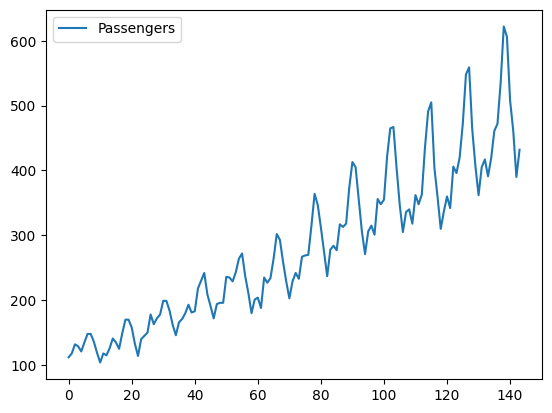

In [58]:
data.plot()
plt.show()

[1,2,3,4,5,6,7,8,9,10]
time step =3

* 1,2,3 > 4
* 2,3,4 > 5
* 3,4,5 > 6
* 4,5,6 > 7
* 5,6,7 > 8
* 6,7,8 > 9
* 7,8,9 > 10


In [59]:
def prepare_data(seq, time_step):
    x,y = [], []
    for i in range(len(seq) - time_step):
        x.append(seq[i:i+time_step])
        y.append(seq[i+time_step])
    return np.array(x), np.array(y)

In [60]:
time_step = 20
x,y = prepare_data(data.values, time_step)

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.optimizers import Adam

In [62]:
x.reshape(x.shape[0], x.shape[1],1)

array([[[112],
        [118],
        [132],
        ...,
        [149],
        [170],
        [170]],

       [[118],
        [132],
        [129],
        ...,
        [170],
        [170],
        [158]],

       [[132],
        [129],
        [121],
        ...,
        [170],
        [158],
        [133]],

       ...,

       [[342],
        [406],
        [396],
        ...,
        [622],
        [606],
        [508]],

       [[406],
        [396],
        [420],
        ...,
        [606],
        [508],
        [461]],

       [[396],
        [420],
        [472],
        ...,
        [508],
        [461],
        [390]]], dtype=int64)

In [63]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(time_step,1)))
model.add(Dense(1))

In [64]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss = 'mse')

In [65]:
history = model.fit(x,y, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
7/7 [==============================] - 1s 34ms/step - loss: 49123.1680 - val_loss: 48616.5195
Epoch 2/100
7/7 [==============================] - 0s 9ms/step - loss: 9108.5654 - val_loss: 24266.3652
Epoch 3/100
7/7 [==============================] - 0s 8ms/step - loss: 6815.1553 - val_loss: 13171.3613
Epoch 4/100
7/7 [==============================] - 0s 7ms/step - loss: 3519.1292 - val_loss: 11529.1846
Epoch 5/100
7/7 [==============================] - 0s 8ms/step - loss: 4789.3281 - val_loss: 7471.9048
Epoch 6/100
7/7 [==============================] - 0s 8ms/step - loss: 4012.3689 - val_loss: 11327.1191
Epoch 7/100
7/7 [==============================] - 0s 8ms/step - loss: 2053.1658 - val_loss: 8600.3350
Epoch 8/100
7/7 [==============================] - 0s 9ms/step - loss: 2746.8684 - val_loss: 4662.4102
Epoch 9/100
7/7 [==============================] - 0s 7ms/step - loss: 1500.8639 - val_loss: 2043.7595
Epoch 10/100
7/7 [==============================] - 0s 7ms/step - 

In [66]:
loss = history.history['loss']
val_loss = history.history['val_loss']
print(f'{loss =}, {val_loss= }')

loss =[49123.16796875, 9108.5654296875, 6815.1552734375, 3519.129150390625, 4789.328125, 4012.368896484375, 2053.165771484375, 2746.868408203125, 1500.8638916015625, 1030.4344482421875, 1395.957275390625, 1433.771484375, 1482.2724609375, 1493.860107421875, 1424.451171875, 1299.7103271484375, 1198.375244140625, 1113.7493896484375, 1095.1636962890625, 1043.9193115234375, 927.822998046875, 859.0870971679688, 831.0465087890625, 804.4895629882812, 759.4942626953125, 993.0874633789062, 834.0702514648438, 943.3656616210938, 936.102294921875, 846.3251953125, 720.2001953125, 694.6239624023438, 728.2393188476562, 714.7073974609375, 676.3753662109375, 682.5128784179688, 833.8963012695312, 822.770263671875, 713.7543334960938, 717.5379028320312, 758.5426635742188, 787.0732421875, 750.1716918945312, 660.5934448242188, 598.69873046875, 547.2993774414062, 584.6582641601562, 706.8271484375, 515.6009521484375, 552.412841796875, 515.0219116210938, 487.4674987792969, 463.47882080078125, 462.6808776855469,

In [67]:
model.evaluate(x,y)

4/4 [==============================] - 0s 5ms/step - loss: 566.6771


566.6770629882812

In [68]:
test_seq = data.values[-time_step:].flatten()
prediction = []

for _ in range(100):
    pred = model.predict(test_seq.reshape(1,time_step,1))[0,0]
    prediction.append(pred)
    test_seq =  np.append(test_seq[1:], pred)

1/1 [==============================] - 0s 16ms/step


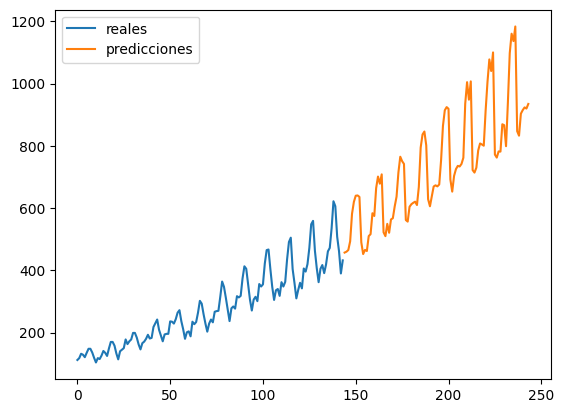

In [69]:
plt.plot(range(len(data.values)), data.values, label = 'reales' )
plt.plot(range(len(data.values),len(data.values)+100),prediction, label = 'predicciones')
plt.legend()
plt.show()